<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_RLabs10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBH 6886: R Lab 010

## Edward Sung

## 11/12/24

# Code from Lecture 10

>[Code from Lecture 10](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=R5w4JrGYhjiy)

>>[Regression Tree Example in R](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=1WeOc68LlPvf)

>>[Classification Tree Example in R](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=HOa5n0_ClbP6)

>>[Bagging with Trees Example](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=h0WGmseAmWpR)

>>[Random Forest with Regression Trees Example](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=snLqym9HnHHl)



In [49]:
# Install Libraries
install.packages("caret")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:
# Libraries
library(dplyr)
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)

## Regression Tree Example in R

In [51]:
# load the prostate data
prostate_data <- read_csv("/content/prostate_data(3).csv")

# training data set
prostate_data_train <- prostate_data[prostate_data$train, ]

# testing data set
prostate_data_test <- prostate_data[!prostate_data$train, ]

Rows: 97 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45, lpsa
lgl (1): train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [52]:
# fit a regression tree via recursive partitioning for lpsa on all eight predictors using training data
set.seed(1234)

rtree_lpsa_01 <- rpart(lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45,
                       data = prostate_data_train, method = "anova",
                       control = rpart.control(minsplit = 20, minbucket = 5, cp = 0, xval = 10))

In [53]:
rtree_lpsa_01

n= 67 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 67 96.281450 2.4523450  
   2) lcavol< 1.050767 25 24.815010 1.5219940  
     4) lcavol< -0.4785564 8  5.374086 0.5459795 *
     5) lcavol>=-0.4785564 17  8.233809 1.9812950 *
   3) lcavol>=1.050767 42 36.947370 3.0061250  
     6) lcavol< 2.791651 34 21.288680 2.7485950  
      12) lweight< 3.462546 12  7.787709 2.2215290 *
      13) lweight>=3.462546 22  8.349072 3.0360850  
        26) lbph< -0.5537256 6  2.395393 2.6052980 *
        27) lbph>=-0.5537256 16  4.422661 3.1976310 *
     7) lcavol>=2.791651 8  3.820225 4.1006300 *

In [54]:
# rpart automatically determines the alpha
# (cost complexity parameter) values
# and the corresponding CV error rate (MSE)
printcp(rtree_lpsa_01)


Regression tree:
rpart(formula = lpsa ~ lcavol + lweight + age + lbph + svi + 
    lcp + gleason + pgg45, data = prostate_data_train, method = "anova", 
    control = rpart.control(minsplit = 20, minbucket = 5, cp = 0, 
        xval = 10))

Variables actually used in tree construction:
[1] lbph    lcavol  lweight

Root node error: 96.281/67 = 1.437

n= 67 

        CP nsplit rel error  xerror     xstd
1 0.358523      0   1.00000 1.04735 0.181313
2 0.122957      1   0.64148 1.08708 0.143706
3 0.116400      2   0.51852 0.79781 0.110082
4 0.053509      3   0.40212 0.72350 0.102674
5 0.015901      4   0.34861 0.67834 0.091668
6 0.000000      5   0.33271 0.66974 0.091741


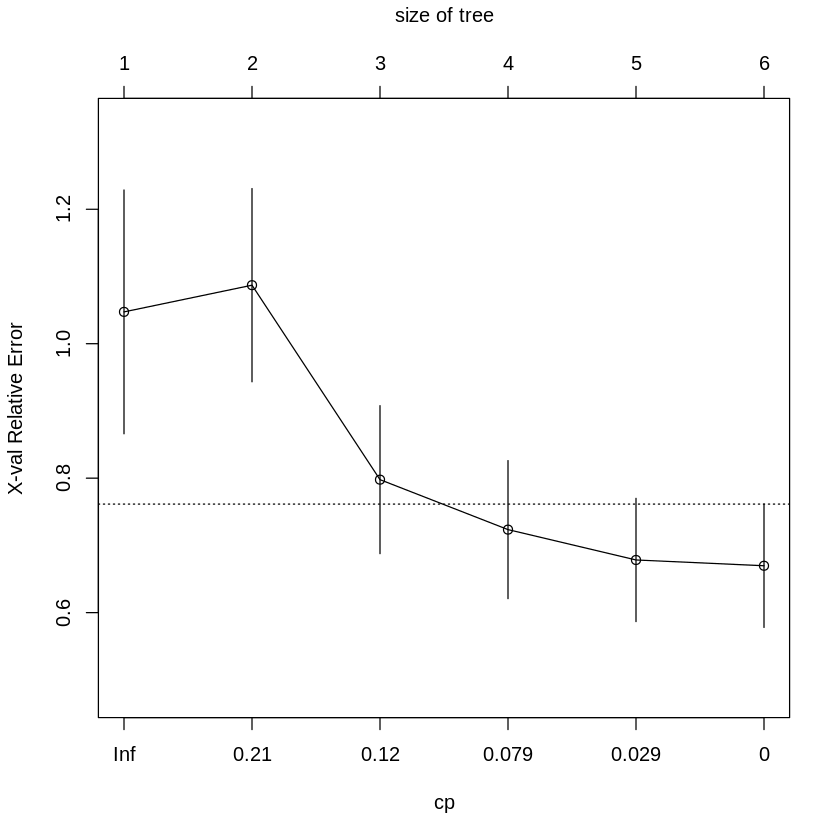

In [55]:
# plot CV curve
plotcp(rtree_lpsa_01)

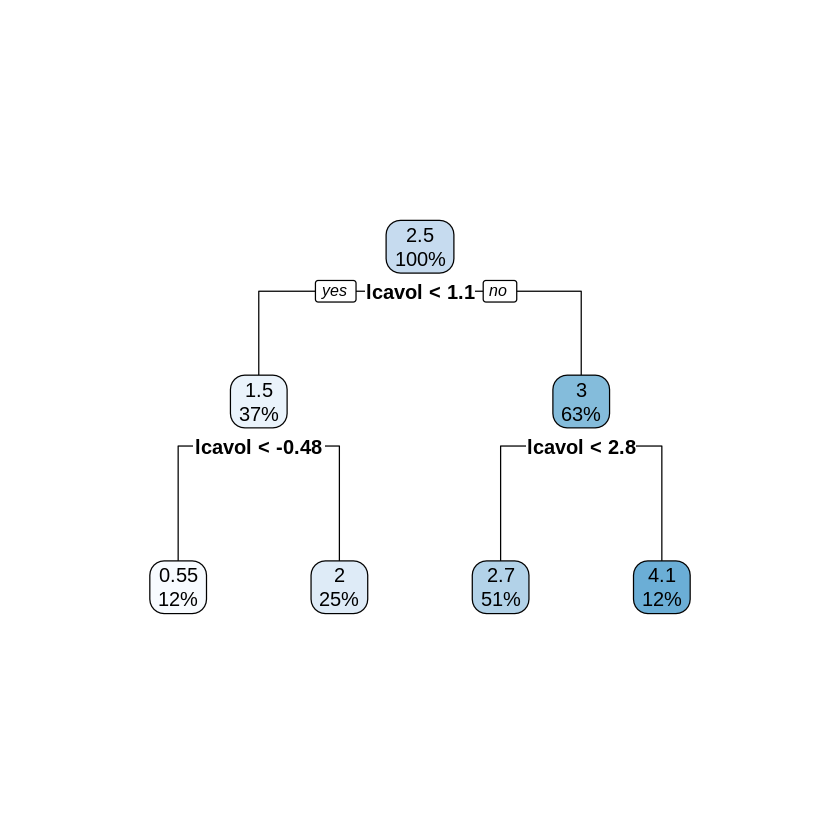

In [56]:
rtree_lpsa_01_sel <- rpart(lpsa ~ lcavol + lweight + age +
                           lbph + svi + lcp + gleason + pgg45,
                         data = prostate_data_train, method = "anova",
                         control = rpart.control(minsplit = 20, minbucket = 5,
                                                 cp = 0.053509, xval = 10))

# plot the regression tree for selected alpha (cp) value
rpart.plot(rtree_lpsa_01_sel)

In [57]:
pred_rtree_lpsa_01_sel <- predict(rtree_lpsa_01_sel, newdata = prostate_data_test)
pred_rtree_lpsa_01_sel

1         2         3         4         5         6         7         8 
1.9812953 0.5459795 1.9812953 2.7485949 2.7485949 1.9812953 2.7485949 1.9812953 
        9        10        11        12        13        14        15        16 
1.9812953 1.9812953 2.7485949 2.7485949 2.7485949 2.7485949 2.7485949 2.7485949 
       17        18        19        20        21        22        23        24 
1.9812953 2.7485949 4.1006298 1.9812953 2.7485949 2.7485949 2.7485949 2.7485949 
       25        26        27        28        29        30 
2.7485949 2.7485949 2.7485949 2.7485949 4.1006298 4.1006298

In [58]:
# look at the alpha (cp) values from the fitted tree and set up values to check
tg_regtr <- data.frame(cp = rtree_lpsa_01$cptable[,1])

set.seed(1234)

rtree_lpsa_10cv <- train(x = as.matrix(prostate_data_train[,1:8]), y = prostate_data_train$lpsa,
                                       method = "rpart", control = rpart.control(minsplit = 20, minbucket = 5),
                                       tuneGrid = tg_regtr, trControl = trainControl(method = "cv", number = 10, selectionFunction = "oneSE"))

rtree_lpsa_10cv

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


CART 

67 samples
 8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 59, 61, 59, 60, 61, 62, ... 
Resampling results across tuning parameters:

  cp          RMSE       Rsquared   MAE      
  0.00000000  0.9689490  0.3888172  0.8384561
  0.01590149  0.9689490  0.3888172  0.8384561
  0.05350873  0.9873671  0.3833782  0.8550172
  0.11639953  1.0406506  0.3182641  0.9104677
  0.12295687  1.0621995  0.2901872  0.9222400
  0.35852251  1.2040486  0.1684692  1.0278886

RMSE was used to select the optimal model using  the one SE rule.
The final value used for the model was cp = 0.1163995.

## Classification Tree Example in R

In [59]:
# data set for heart disease prediction models
heart_data <- read_csv("/content/Heart(1).csv")

# convert ChestPain and Thal to factor variables
heart_data$ChestPain <- factor(heart_data$ChestPain)
heart_data$Thal <- factor(heart_data$Thal)

# split into training and test sets
set.seed(1234)

heart_train_row <- sort(sample(1:303, size = 202))
heart_test_row <- setdiff(1:303, heart_train_row)
heart_data_train <- heart_data[heart_train_row,]
heart_data_test <- heart_data[heart_test_row,]

# remove subjects with missing data
heart_data_train <- heart_data_train[complete.cases(heart_data_train),]
heart_data_test <- heart_data_test[complete.cases(heart_data_test),]

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): ChestPain, Thal, AHD
dbl (11): Age, Sex, RestBP, Chol, Fbs, RestECG, MaxHR, ExAng, Oldpeak, Slope...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [60]:
#########################################################################################################
# fit a classification tree via recursive partitioning for heart disease outcome using training data
#########################################################################################################
# note that default splitting crit based on gini
set.seed(1234)

ctree_heart_01 <- rpart(AHD ~ Age + Sex + ChestPain + RestBP + Chol + Fbs + RestECG +
                              MaxHR + ExAng + Oldpeak + Slope + Ca + Thal,
                        data = heart_data_train, method = "class", parms = list(split = "gini"),
                        control = rpart.control(minsplit = 20, minbucket = 1), cp = 0)

# get tuning grid for train function
tg_clatr <- data.frame(cp = ctree_heart_01$cptable[,1])

In [61]:
# when training a classification tree using the train() function, make sure that
# the response is a factor variable
heart_data_train_X <- heart_data_train[,1:13]
heart_data_train_Y <- factor(heart_data_train$AHD)

set.seed(1234)

ctree_heart_10cv <- train(x = heart_data_train_X, y = heart_data_train_Y,
                          method = "rpart", parms = list(split = "gini"),
                          control = rpart.control(minsplit = 20, minbucket = 1),
                          tuneGrid = tg_clatr,
                          trControl = trainControl(method = "cv", number = 10, selectionFunction = "oneSE"))

ctree_heart_10cv

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


CART 

198 samples
 13 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 178, 179, 178, 177, 178, 179, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01000000  0.7438221  0.4922882
  0.01075269  0.7438221  0.4922882
  0.02150538  0.7543484  0.5129385
  0.05913978  0.7330075  0.4651587
  0.50537634  0.6443233  0.2611008

Accuracy was used to select the optimal model using  the one SE rule.
The final value used for the model was cp = 0.05913978.

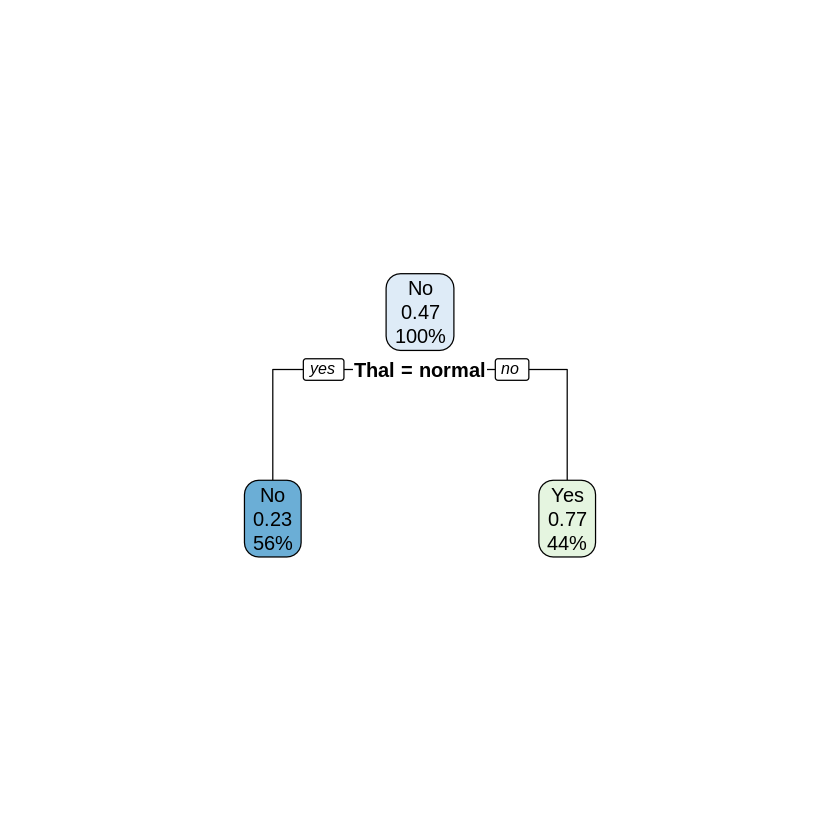

In [62]:
# plot the selected classification tree
rpart.plot(ctree_heart_10cv$finalModel)

In [63]:
pred_ctree_heart <- predict(ctree_heart_10cv$finalModel,
                            newdata = heart_data_test)

head(pred_ctree_heart)

,No,Yes
1,0.2298851,0.7701149
2,0.7657658,0.2342342
3,0.7657658,0.2342342
4,0.2298851,0.7701149
5,0.2298851,0.7701149
6,0.2298851,0.7701149


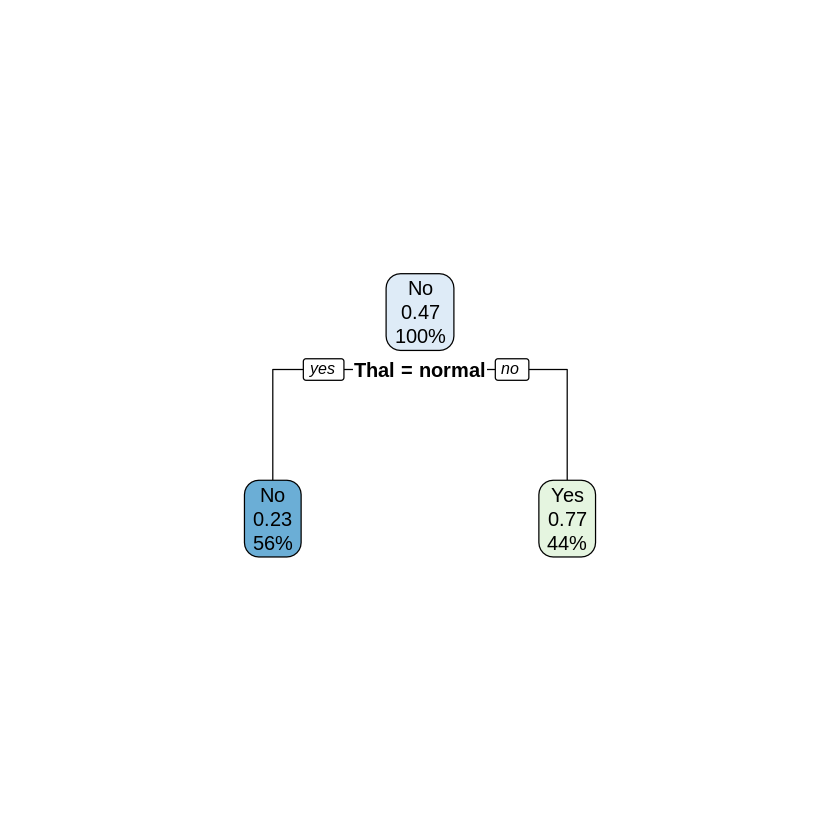

In [64]:
rpart.plot(ctree_heart_10cv$finalModel)

## Bagging with Trees Example

In [65]:
set.seed(1234)

bag_lpsa_01 <- randomForest(lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45,
                            data = prostate_data_train, ntree = 500, mtry = 8, importance = TRUE)

bag_lpsa_01


Call:
 randomForest(formula = lpsa ~ lcavol + lweight + age + lbph +      svi + lcp + gleason + pgg45, data = prostate_data_train,      ntree = 500, mtry = 8, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 8

          Mean of squared residuals: 0.7375386
                    % Var explained: 48.68

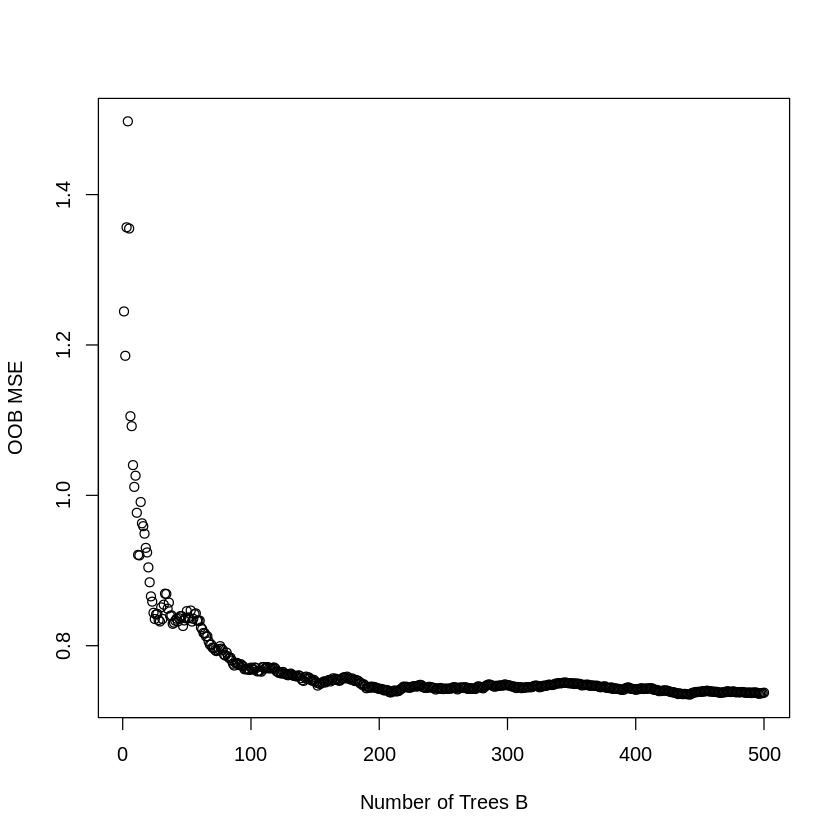

In [66]:
# can plot OOB MSE vs. number of trees
plot(x = 1:500, y = bag_lpsa_01$mse, xlab = "Number of Trees B", ylab = "OOB MSE")

In [67]:
# get OOB estimate for RMSE
sqrt(bag_lpsa_01$mse[500])

[1] 0.8588007

In [68]:
pred_bag_lpsa <- predict(bag_lpsa_01, newdata = prostate_data_test)
pred_bag_lpsa

1         2         3         4         5         6         7         8 
1.4310943 0.7071534 1.5508508 1.7011662 2.8507584 1.8693525 1.9080051 2.1465569 
        9        10        11        12        13        14        15        16 
2.0032460 1.4656522 2.6429140 2.1773464 2.7933311 2.6865906 2.0550058 2.0197373 
       17        18        19        20        21        22        23        24 
2.1227066 2.9274990 3.1024320 1.8102656 3.1648709 3.1013646 2.0796161 2.6678723 
       25        26        27        28        29        30 
2.8919691 3.1919251 3.2611756 3.0119637 3.4540019 3.9096285

In [69]:
# for fun, find test RMSE
sqrt(mean((prostate_data_test$lpsa - pred_bag_lpsa)^2))

[1] 0.6404845

In [70]:
set.seed(1234)

bag_lpsa_10cv <- train(x = as.matrix(prostate_data_train[,1:8]), y = prostate_data_train$lpsa,
                                     method = "rf", ntree = 500, tuneGrid = data.frame(mtry = 8),
                                     trControl = trainControl(method = "cv", number = 10))

bag_lpsa_10cv

Random Forest 

67 samples
 8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 59, 61, 59, 60, 61, 62, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.8476413  0.5638751  0.7154039

Tuning parameter 'mtry' was held constant at a value of 8

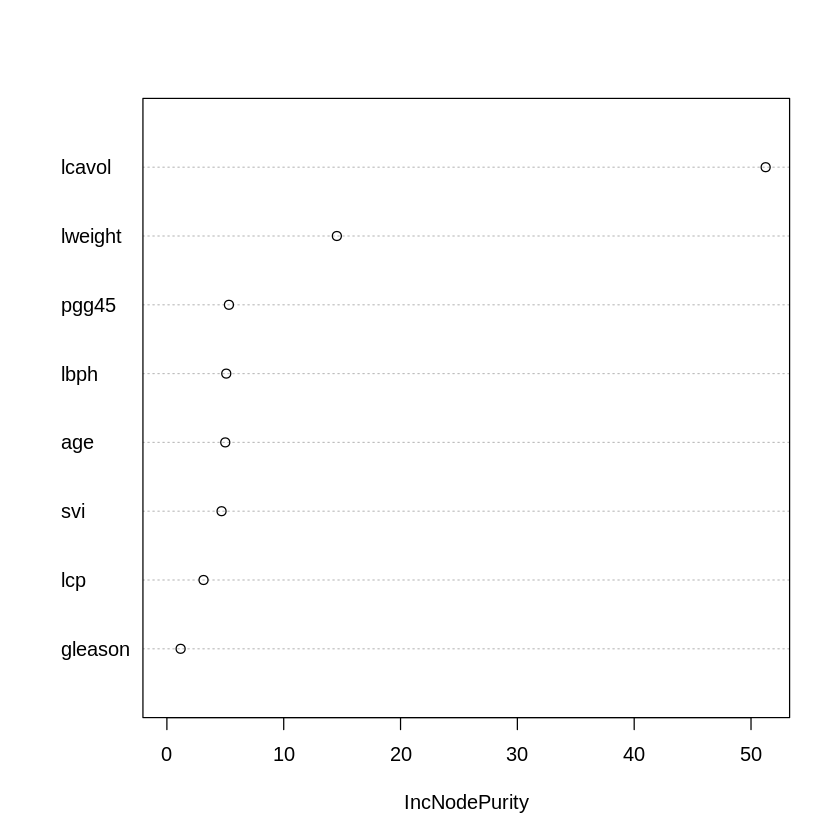

In [71]:
# make variable importance plot
# type = 1 is for %IncMSE, 2 is for IncNodePurity (measured by RSS)
varImpPlot(bag_lpsa_10cv$finalModel, type = 2, main = "")

## Random Forest with Regression Trees Example

In [72]:
set.seed(1234)

rf_lpsa_10cv <- train(x = as.matrix(prostate_data_train[,1:8]), y = prostate_data_train$lpsa,
                                    method = "rf", ntree = 500, tuneGrid = data.frame(mtry = 1:8),
                                    trControl = trainControl(method = "cv", number = 10))

rf_lpsa_10cv

Random Forest 

67 samples
 8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 59, 61, 59, 60, 61, 62, ... 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  1     0.8241238  0.6151008  0.6662603
  2     0.8111902  0.6125655  0.6711516
  3     0.8182353  0.6001650  0.6805532
  4     0.8225155  0.5953565  0.6931608
  5     0.8326976  0.5889966  0.6940795
  6     0.8283493  0.5806107  0.6944727
  7     0.8404905  0.5738430  0.7012668
  8     0.8586723  0.5571010  0.7216395

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.

In [73]:
rf_lpsa_10cv$finalModel


Call:
 randomForest(x = x, y = y, ntree = 500, mtry = param$mtry) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 0.696716
                    % Var explained: 51.52